In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Navigate to the folder in your drive where the audio files are located
import os
audio_folder = '/content/drive/MyDrive/Diacwoz/AudioFiles'
print(os.listdir(audio_folder))  # To check the contents of the folder


['300_AUDIO.wav', '301_AUDIO.wav', '302_AUDIO.wav', '303_AUDIO.wav', '304_AUDIO.wav', '305_AUDIO.wav', '306_AUDIO.wav', '307_AUDIO.wav', '308_AUDIO.wav', '309_AUDIO.wav', '310_AUDIO.wav', '311_AUDIO.wav', '312_AUDIO.wav', '313_AUDIO.wav', '314_AUDIO.wav', '315_AUDIO.wav', '316_AUDIO.wav', '317_AUDIO.wav', '318_AUDIO.wav', '319_AUDIO.wav', '320_AUDIO.wav', '321_AUDIO.wav', '322_AUDIO.wav', '323_AUDIO.wav', '324_AUDIO.wav', '325_AUDIO.wav', '326_AUDIO.wav', '327_AUDIO.wav', '328_AUDIO.wav', '329_AUDIO.wav', '330_AUDIO.wav', '331_AUDIO.wav', '332_AUDIO.wav', '333_AUDIO.wav', '334_AUDIO.wav', '335_AUDIO.wav', '336_AUDIO.wav', '338_AUDIO.wav', '337_AUDIO.wav', '339_AUDIO.wav', '340_AUDIO.wav', '341_AUDIO.wav', '343_AUDIO.wav', '344_AUDIO.wav', '345_AUDIO.wav', '346_AUDIO.wav', '347_AUDIO.wav', '348_AUDIO.wav', '349_AUDIO.wav', '350_AUDIO.wav', '351_AUDIO.wav', '352_AUDIO.wav', '353_AUDIO.wav', '354_AUDIO.wav', '357_AUDIO.wav', '355_AUDIO.wav', '356_AUDIO.wav', '358_AUDIO.wav', '360_AUDIO.wa

In [ ]:
!pip install keras tensorflow librosa scikit-learn


In [ ]:
import librosa
import numpy as np
import os

# Function to extract MFCC features
def extract_mfcc(file_path, sample_rate=16000):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc

# Extract MFCCs from all files in the folder
audio_files = [os.path.join(audio_folder, f) for f in os.listdir(audio_folder) if f.endswith('.wav')]

X = []
for file in audio_files:
    mfcc = extract_mfcc(file)
    X.append(mfcc)

X = np.array(X)
print(f"Extracted MFCC features from {len(X)} files.")


Extracted MFCC features from 138 files.


In [ ]:
# Example: Assuming the first half are 'depressed' and the rest are 'not depressed'
y = np.array([1] * (len(X) // 2) + [0] * (len(X) // 2))

print(f"Labels: {y}")


Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

def build_depaudionet_model(input_shape):
    model = Sequential()

    # 1D Convolutional layers for feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM for temporal dependencies
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.5))

    # Dense layers for classification
    model.add(Flatten())  # Flatten before the dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Check the model summary
model = build_depaudionet_model((X.shape[1], 1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 5, 100)              │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,457 (333.82 KB)

 Trainable params: 85,457 (333.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape expected by the model
X_train = np.expand_dims(X_train, axis=-1)  # Add the channel dimension
X_test = np.expand_dims(X_test, axis=-1)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.6818 - val_loss: 2.1959
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.6818 - val_loss: 2.1048
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9826 - loss: 0.0181 - val_accuracy: 0.6818 - val_loss: 2.1112
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.6818 - val_loss: 2.1901
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.6364 - val_loss: 2.2429
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.5909 - val_loss: 2.3275
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.5909 - val_loss: 2.2791
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9904 - loss: 0.0193 - val_accuracy: 0.6818 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5714 - loss: 5.1834
Test Accuracy: 57.14%


In [ ]:
# Function to predict depression
def predict_depression(file_path):
    mfcc = extract_mfcc(file_path)
    mfcc = np.expand_dims(mfcc, axis=0)  # Reshape for model input
    mfcc = np.expand_dims(mfcc, axis=-1)  # Add channel dimension
    prediction = model.predict(mfcc)
    return 'Depressed' if prediction >= 0.5 else 'Not Depressed'

# Test on new audio files
for audio_file in audio_files:
    result = predict_depression(audio_file)
    print(f"Prediction for {audio_file}: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/300_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/301_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/302_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/303_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/304_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/305_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/306_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for /content/drive/MyDrive/Diacwoz/AudioFiles/307_AUDIO.wav: Depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
P

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Not Depressed', 'Depressed']))

# Confusion matrix to see the breakdown of correct/incorrect predictions
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
               precision    recall  f1-score   support

Not Depressed       0.47      0.67      0.55        12
    Depressed       0.64      0.44      0.52        16

     accuracy                           0.54        28
    macro avg       0.55      0.55      0.54        28
 weighted avg       0.57      0.54      0.53        28

Confusion Matrix:
 [[8 4]
 [9 7]]


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8306 - loss: 0.4374 - val_accuracy: 0.5909 - val_loss: 0.7731
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7710 - loss: 0.4156 - val_accuracy: 0.6818 - val_loss: 0.5321
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8327 - loss: 0.3935 - val_accuracy: 0.8182 - val_loss: 0.4183
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7880 - loss: 0.4300 - val_accuracy: 0.6818 - val_loss: 0.4818
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8445 - loss: 0.3634 - val_accuracy: 0.6364 - val_loss: 0.5345
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8285 - loss: 0.3912 - val_accuracy: 0.8182 - val_loss: 0.4333
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8111 - loss: 0.3999 - val_accuracy: 0.7273 - val_loss: 0.4857
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8814 - loss: 0.3184 - val_accuracy: 0.7273 - val_loss: 0.4494

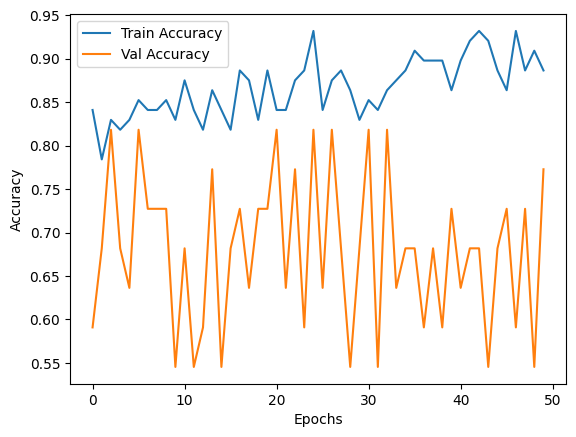

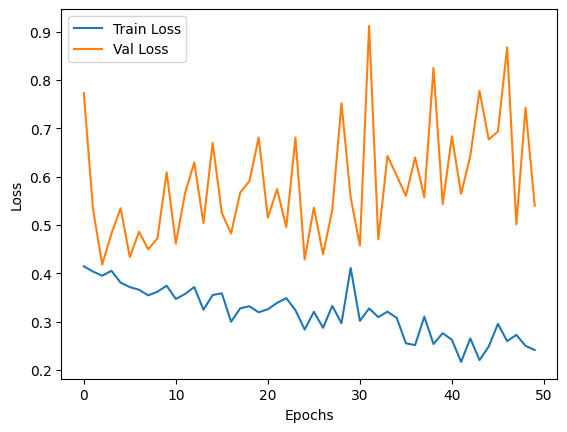

In [ ]:
import matplotlib.pyplot as plt

# Assuming you saved the history of training using model.fit(..., return_history=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Diacwoz/depaudionet_model.h5')

In [ ]:
# prompt: load the model

# Assuming you have already trained and saved the model as 'depaudionet_model.h5'
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Diacwoz/depaudionet_model.h5')  # Replace with the path to your saved model


# Function to predict depression (using the loaded model)
def predict_depression(file_path):
    mfcc = extract_mfcc(file_path)
    mfcc = np.expand_dims(mfcc, axis=0)  # Reshape for model input
    mfcc = np.expand_dims(mfcc, axis=-1)  # Add channel dimension
    prediction = model.predict(mfcc)
    return 'Depressed' if prediction >= 0.5 else 'Not Depressed'

# Example usage with a new audio file
new_audio_file = '/content/Case study clinical example_ Session with a client with Bipolar Disorder (fluctuations in mood) (1) (online-audio-converter.com).wav'  # Replace with the actual path to your new audio file
result = predict_depression(new_audio_file)
print(f"Prediction for {new_audio_file}: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Prediction for /content/Case study clinical example_ Session with a client with Bipolar Disorder (fluctuations in mood) (1) (online-audio-converter.com).wav: Depressed
